# РТ 4

## регрессия

изучение методов регрессионного анализа для прогнозирования числовых значений на основе исторических данных.

ТО ЧТО ВНИЗУ ОБЯЗАТЕЛЬНО ЗАПУСТИТЬ ЕСЛИ НЕ В КОЛАБЕ ОТКРЫТО, ПОТОМУ ЧТО ПИТОН ТВАРЬ И НЕ ВКЛЮЧАЕТ НУЖНЫЕ БИБЛИОТЕКИ


In [1]:
import sys
!{sys.executable} -m pip install -q scikit-learn numpy pandas matplotlib scipy seaborn


## Линейная регрессия

1. задание - Регрессия зарплаты от опыта работы

Задача: Построить модель линейной регрессии для зависимости заработной платы от опыта работы. Найти коэффициенты линии регрессии. Построить прогноз.


Данные о зарплатах:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0

Размер датасета: (30, 2)

Статистика:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Размер обучающей выборки: 24
Размер тестовой выборки: 6

Уравнение: Salary = 25321.58 + 9423.82 * YearsExperience
Наклон (slope): 9423.82
Сдвиг (intercept): 25321.58

R² (обучающая выборка): 0.9645
R² (тестовая выборка): 0.9024
RMSE (обучающая выборка): 5205.98
RMSE (тестовая выборка): 705

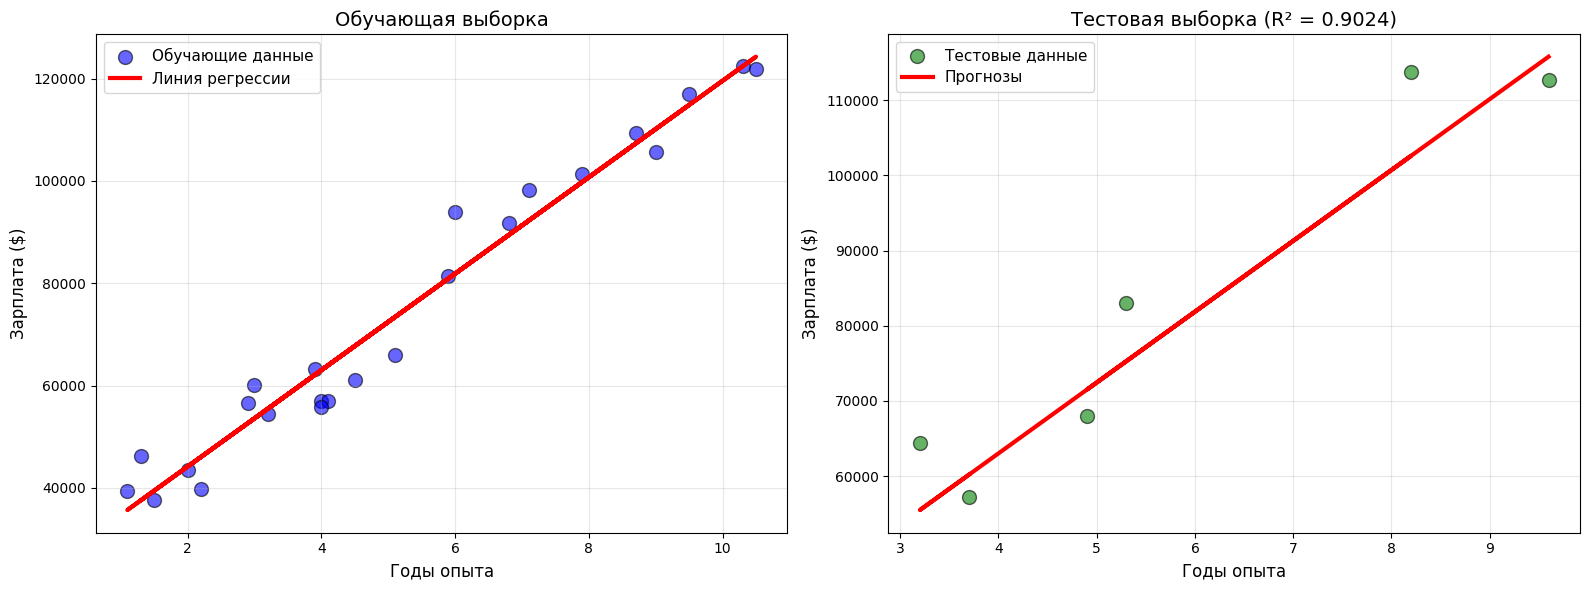


Модель показывает сильную линейную зависимость между опытом работы и зарплатой.


In [2]:
# - Линейная регрессия зарплаты от опыта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#
df = pd.read_csv('data/Salary_Data.csv')

print("Данные о зарплатах:")
print(df.head(10))
print(f"\nРазмер датасета: {df.shape}")
print(f"\nСтатистика:")
print(df.describe())

# подготовка данных
X = df[['YearsExperience']].values  # Годы опыта (независимая переменная)
y = df['Salary'].values  # Зарплата (зависимая переменная)

# тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nРазмер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

# линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# получаем коэффициенты
slope = model.coef_[0]
intercept = model.intercept_

print(f"\n{'='*60}")
print(f"{'='*60}")
print(f"Уравнение: Salary = {intercept:.2f} + {slope:.2f} * YearsExperience")
print(f"Наклон (slope): {slope:.2f}")
print(f"Сдвиг (intercept): {intercept:.2f}")

# прогноз
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# оценка качества модели
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\n{'='*60}")
print(f"{'='*60}")
print(f"R² (обучающая выборка): {train_r2:.4f}")
print(f"R² (тестовая выборка): {test_r2:.4f}")
print(f"RMSE (обучающая выборка): {train_rmse:.2f}")
print(f"RMSE (тестовая выборка): {test_rmse:.2f}")

#
new_experience = np.array([[5], [10], [15]])
predictions = model.predict(new_experience)

print(f"\n{'='*60}")
print(f"ПРОГНОЗЫ ДЛЯ НОВЫХ ЗНАЧЕНИЙ")
print(f"{'='*60}")
for exp, pred in zip(new_experience.flatten(), predictions):
    print(f"Опыт {exp:.0f} лет → Зарплата: ${pred:,.2f}")

# визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Обучающие данные и линия регрессии
axes[0].scatter(X_train, y_train, color='blue', s=100, alpha=0.6, edgecolors='black', label='Обучающие данные')
axes[0].plot(X_train, y_train_pred, color='red', linewidth=3, label='Линия регрессии')
axes[0].set_xlabel('Годы опыта', fontsize=12)
axes[0].set_ylabel('Зарплата ($)', fontsize=12)
axes[0].set_title('Обучающая выборка', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# График 2: Тестовые данные и прогнозы
axes[1].scatter(X_test, y_test, color='green', s=100, alpha=0.6, edgecolors='black', label='Тестовые данные')
axes[1].plot(X_test, y_test_pred, color='red', linewidth=3, label='Прогнозы')
axes[1].set_xlabel('Годы опыта', fontsize=12)
axes[1].set_ylabel('Зарплата ($)', fontsize=12)
axes[1].set_title(f'Тестовая выборка (R² = {test_r2:.4f})', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nМодель показывает сильную линейную зависимость между опытом работы и зарплатой.")


## Множественная регрессия

задание - Множественная регрессия

Задача: Построить модель множественной линейной регрессии для датасета о потреблении бензина (petrol_consumption.csv) или о качестве красного вина (winequality-red.csv). Найти коэффициенты множественной регрессии. Построить прогноз.


Данные о качестве красного вина:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.

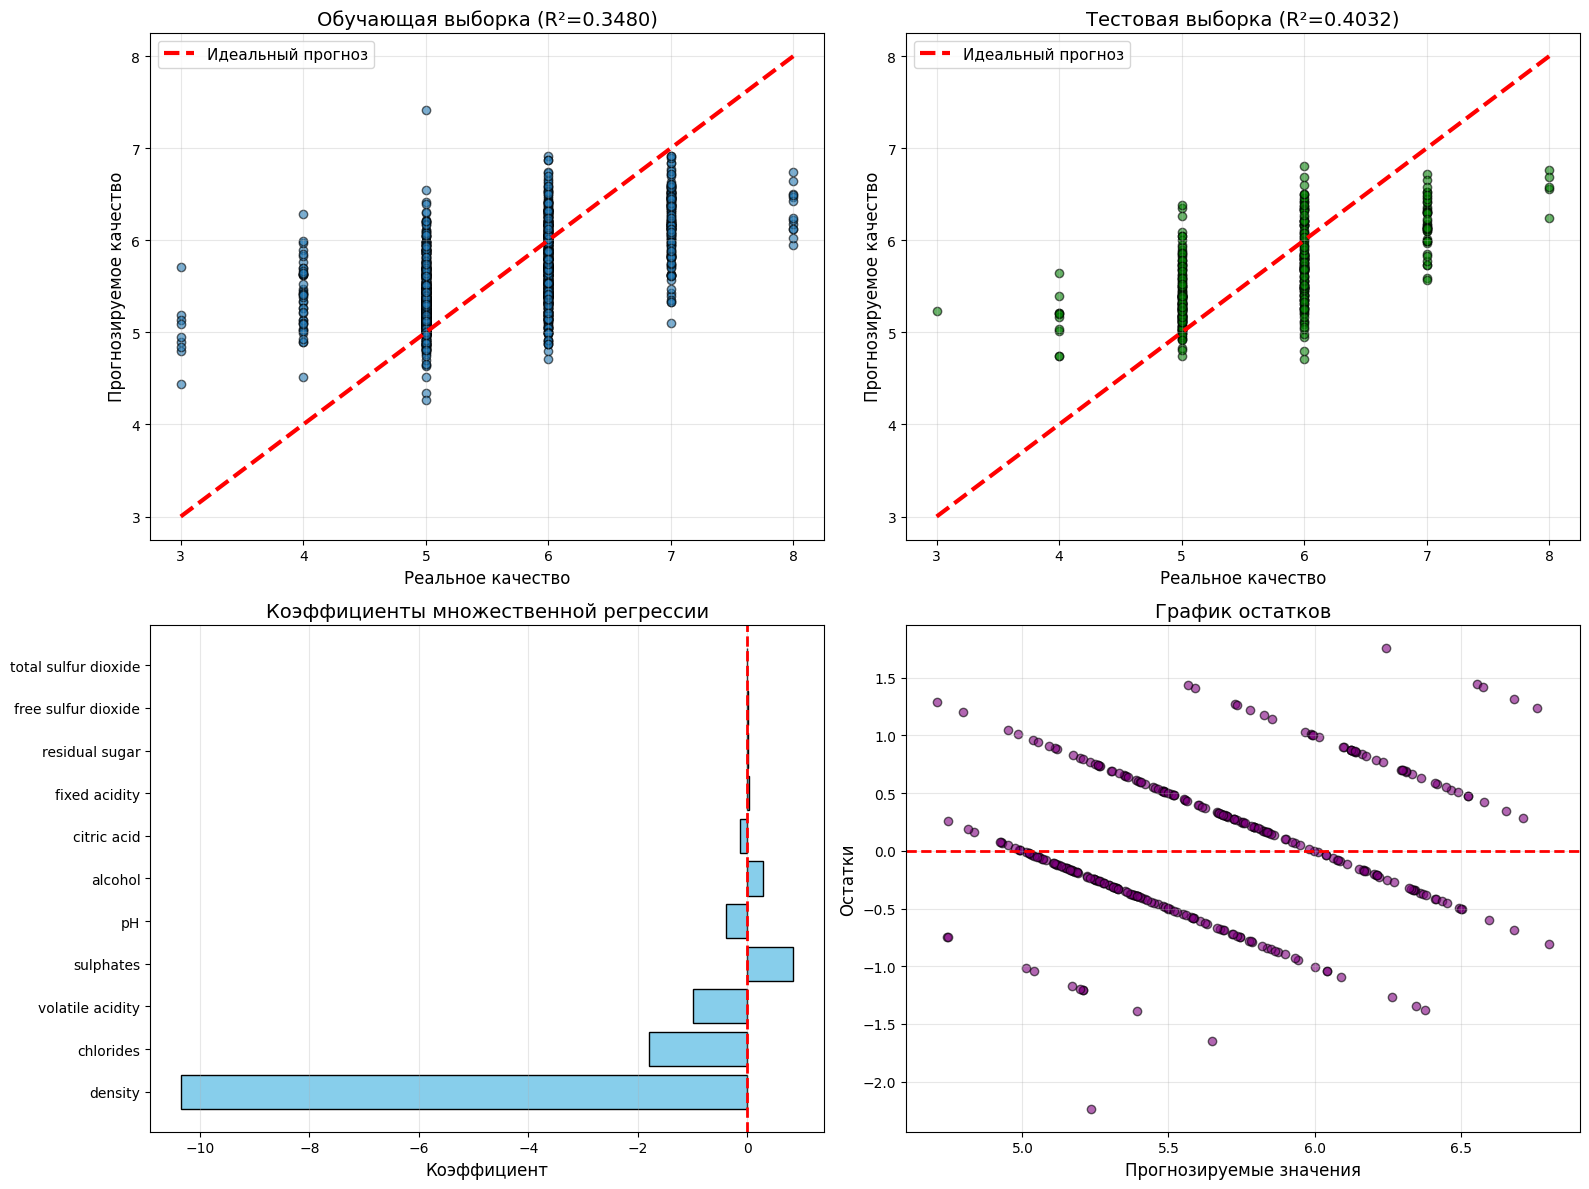


Модель множественной регрессии показывает R² = 0.4032 на тестовой выборке.
Наиболее важные признаки по абсолютному значению коэффициента:
  - density: -10.3516
  - chlorides: -1.8065
  - volatile acidity: -1.0013
  - sulphates: 0.8412
  - pH: -0.3937


In [3]:
# - Множественная регрессия (качество вина)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# красного вина
df = pd.read_csv('data/winequality-red.csv')

print("Данные о качестве красного вина:")
print(df.head())
print(f"\nРазмер датасета: {df.shape}")
print(f"\nНазвания признаков:")
print(df.columns.tolist())
print(f"\nСтатистика:")
print(df.describe())

# целевой переменной (quality)
correlations = df.corr()['quality'].sort_values(ascending=False)
print(f"\nКорреляция признаков с качеством вина:")
print(correlations)

# подготовка данных
# качества (quality) как независимые переменные
X = df.drop('quality', axis=1).values
y = df['quality'].values
feature_names = df.drop('quality', axis=1).columns.tolist()

# тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n{'='*60}")
print(f"{'='*60}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

# множественной линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# получаем коэффициенты
coefficients = model.coef_
intercept = model.intercept_

print(f"\n{'='*60}")
print(f"{'='*60}")
print(f"Intercept (свободный член): {intercept:.4f}")
print(f"\nКоэффициенты для каждого признака:")
for feature, coef in zip(feature_names, coefficients):
    print(f"  {feature:30s}: {coef:8.4f}")

# прогноз
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# оценка качества модели
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n{'='*60}")
print(f"{'='*60}")
print(f"R² (обучающая выборка): {train_r2:.4f}")
print(f"R² (тестовая выборка): {test_r2:.4f}")
print(f"RMSE (обучающая выборка): {train_rmse:.4f}")
print(f"RMSE (тестовая выборка): {test_rmse:.4f}")
print(f"MAE (обучающая выборка): {train_mae:.4f}")
print(f"MAE (тестовая выборка): {test_mae:.4f}")

# визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Реальные vs Прогнозируемые значения (обучающая выборка)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, edgecolors='black')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', lw=3, label='Идеальный прогноз')
axes[0, 0].set_xlabel('Реальное качество', fontsize=12)
axes[0, 0].set_ylabel('Прогнозируемое качество', fontsize=12)
axes[0, 0].set_title(f'Обучающая выборка (R²={train_r2:.4f})', fontsize=14)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# График 2: Реальные vs Прогнозируемые значения (тестовая выборка)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green', edgecolors='black')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=3, label='Идеальный прогноз')
axes[0, 1].set_xlabel('Реальное качество', fontsize=12)
axes[0, 1].set_ylabel('Прогнозируемое качество', fontsize=12)
axes[0, 1].set_title(f'Тестовая выборка (R²={test_r2:.4f})', fontsize=14)
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# График 3: Коэффициенты регрессии
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
axes[1, 0].barh(range(len(coefficients)), coefficients[sorted_indices], color='skyblue', edgecolor='black')
axes[1, 0].set_yticks(range(len(coefficients)))
axes[1, 0].set_yticklabels([feature_names[i] for i in sorted_indices], fontsize=10)
axes[1, 0].set_xlabel('Коэффициент', fontsize=12)
axes[1, 0].set_title('Коэффициенты множественной регрессии', fontsize=14)
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)

# График 4: Остатки (residuals)
residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, residuals, alpha=0.6, color='purple', edgecolors='black')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Прогнозируемые значения', fontsize=12)
axes[1, 1].set_ylabel('Остатки', fontsize=12)
axes[1, 1].set_title('График остатков', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nМодель множественной регрессии показывает R² = {test_r2:.4f} на тестовой выборке.")
print(f"Наиболее важные признаки по абсолютному значению коэффициента:")
for i in sorted_indices[:5]:
    print(f"  - {feature_names[i]}: {coefficients[i]:.4f}")
